In [16]:
import scipy as sc
from scipy import stats, optimize, interpolate
import numpy
import functions
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD

matplotlib.rcParams.update({'font.size': 22})
tf.get_logger().setLevel('INFO')

In [17]:
guess = numpy.zeros((1,11))

## Descenso del gradiente conjugado

In [18]:
def CDG(max):
    result = sc.optimize.minimize(functions.error,guess, method = 'CG', options={'maxiter':max})
    planar = result.x
    W,w,wo =functions.convert(planar)
    return result.fun,W,w,wo
 

## Descenso del gradiente

In [19]:
def DG(max):
    opt = SGD(learning_rate=1)
    sgd_guess = [tf.Variable(0.0) for i in range(11)]
    loss = lambda : functions.error(sgd_guess)
    iter = 0
    while(iter < max):
        opt.minimize(loss,sgd_guess)
        iter+=1

    W,w,wo =functions.convert([v.numpy() for v in sgd_guess])
    return loss().numpy(),W,w,wo

## Adam

In [20]:
def ADAM(max):
    opt = Adam(learning_rate=1)
    adam_guess = [tf.Variable(0.0) for i in range(11)]
    loss = lambda : functions.error(adam_guess)
    iter = 0
    while(iter < max):
        opt.minimize(loss,adam_guess)
        iter+=1

    W,w,wo =functions.convert([v.numpy() for v in adam_guess])
    return loss().numpy(),W,w,wo

## Resultados

In [21]:
methods = [CDG,DG,ADAM]
max_iter = 20
for method in methods:
    print(method.__name__)
    error,W,w,wo = method(max_iter)
    print("Error: ",error)
    print("W: ",W)
    print("w: ")
    for row in w:
        print(row)
    print("w0 :",wo)
    print()

CDG
Error:  4.693377633449785e-06
W:  [6.15316712 7.1193765  7.1193765 ]
w: 
[-2.76147322  0.53919878  2.34582673]
[-2.76147322  0.53919878  2.34582673]
w0 : [0.06293751 0.06293751]

DG
Error:  0.08051824
W:  [1.1678742, 1.667193, 1.667193]
w: 
[-0.6895213, 0.013628404, 0.5497087]
[-0.6895213, 0.013628404, 0.5497087]
w0 : [-0.008012942, -0.008012942]

ADAM
Error:  5.4507713e-05
W:  [6.077131, 5.6890965, 5.6890965]
w: 
[-5.3453593, 3.615021, 5.0510035]
[-5.3453593, 3.615021, 5.0510035]
w0 : [3.707535, 3.707535]



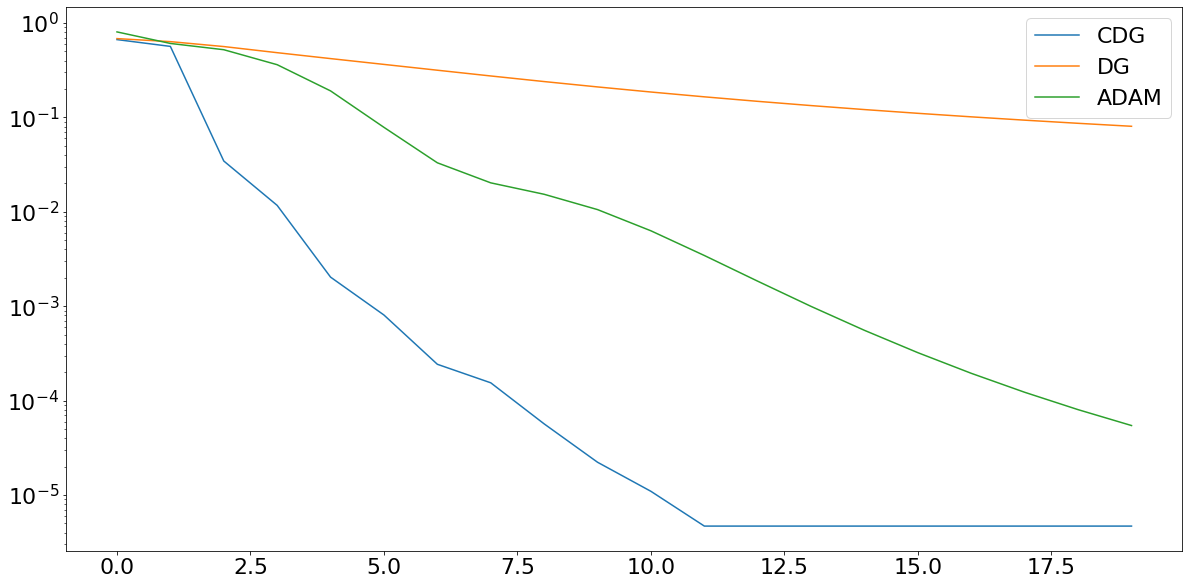

In [23]:
max_iter = 20

plt.figure("Error vs Iterations", figsize=(20,10)) 
plt.yscale("log")
errors = [[],[],[]]
for i in range(max_iter):
    for j,method in enumerate(methods):
        error,W,w,wo = method(i+1)
        errors[j].append(error)

for j,method in enumerate(methods):
    plt.plot(errors[j],label=method.__name__)
plt.legend()
plt.show()